### Required installs

In [11]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels
!pip install yfinance
!pip install mlxtend
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Code question 1: IRIS Dataset Analysis with CART Decision Tree

### Overview
This code implements a CART decision tree classifier on the IRIS dataset, featuring:
- Data split (67% training, 33% testing)
- Model training and accuracy evaluation  
- Comprehensive visualization matrix showing:
  - Confusion matrix 
  - Feature distributions
  - Scatter plot of key features
  - Per-class accuracy metrics

The visualization helps validate the model's classification performance across different perspectives.

Model Accuracy: 0.98


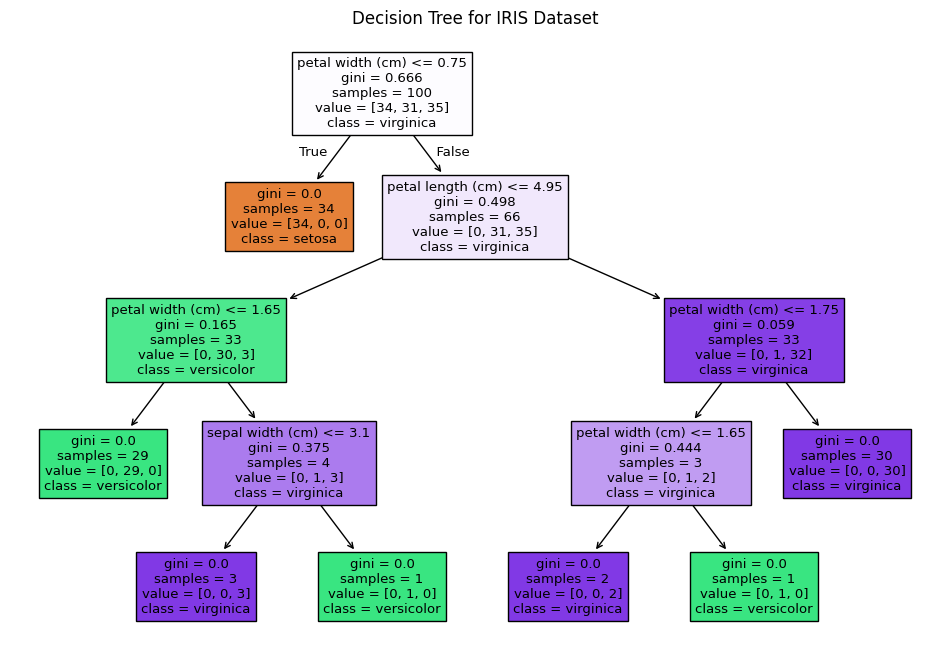

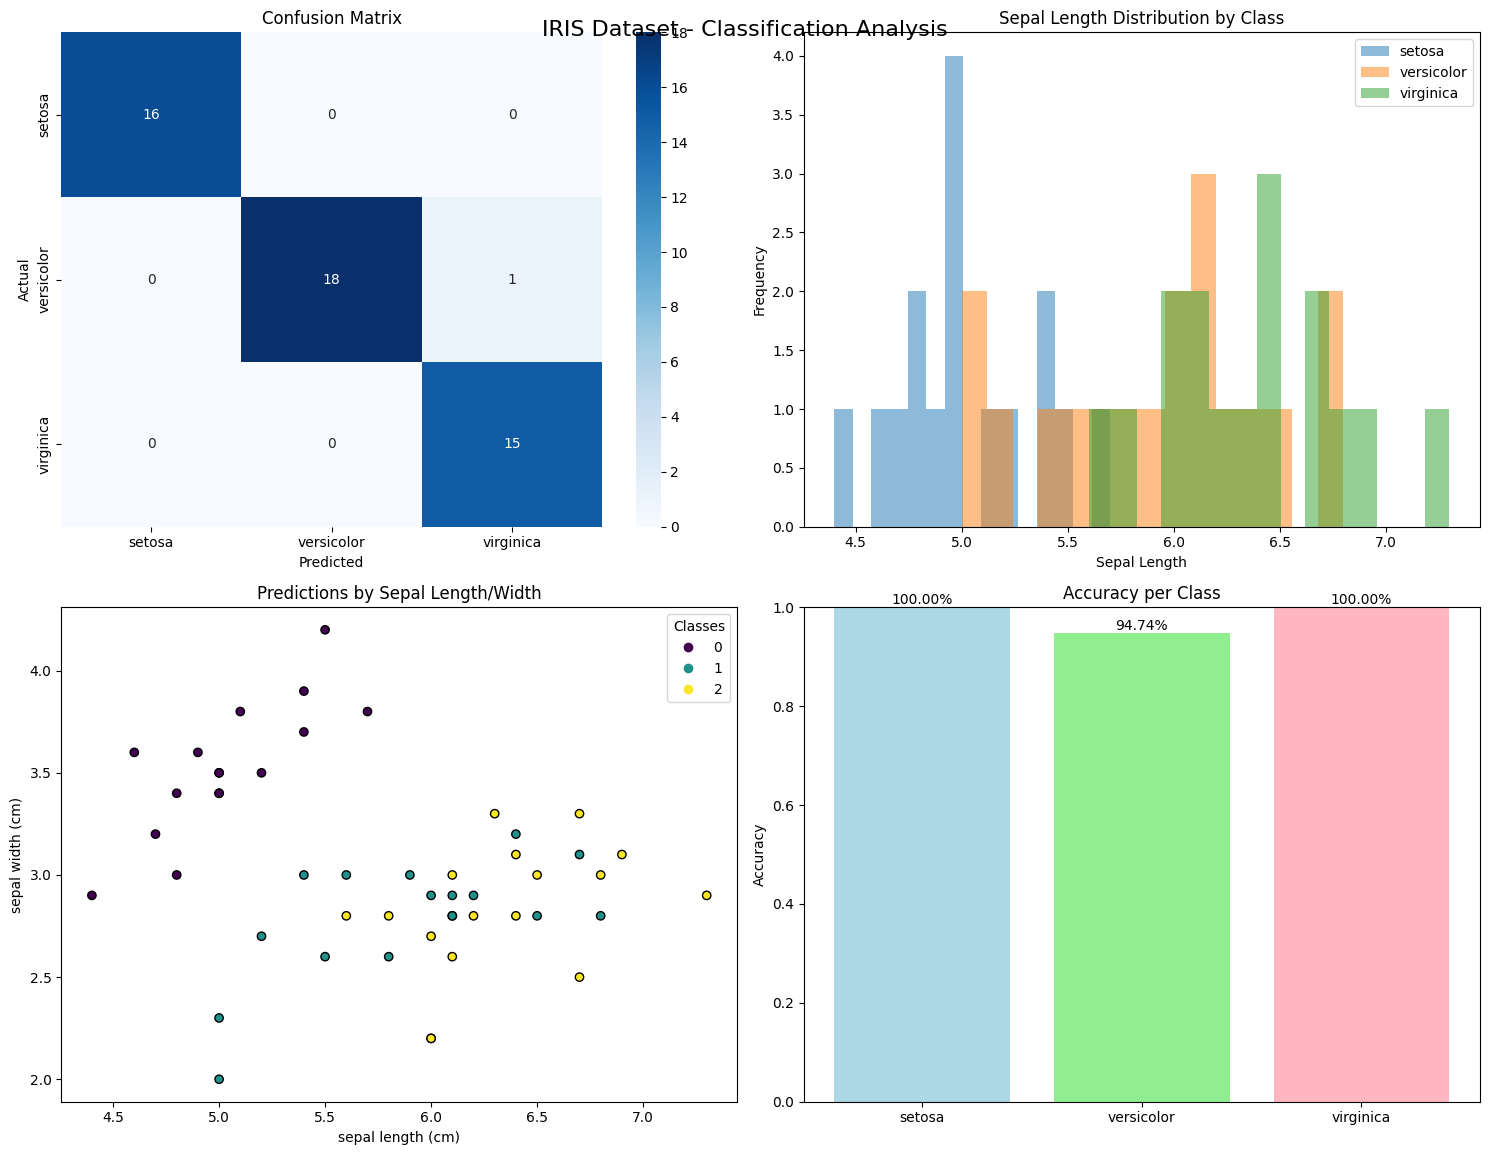

In [12]:
# Q1: Decision Tree Classification on IRIS dataset using CART algorithm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the IRIS dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Train the CART decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for IRIS Dataset")
plt.show()

# Create a 2x2 multiplot matrix
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('IRIS Dataset - Classification Analysis', fontsize=16, y=0.95)

# Plot 1: Confusion Matrix (top left)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names, 
            ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# Plot 2: Feature Distribution (top right)
for i in range(3):
    axes[0,1].hist(X_test[y_pred == i, 0], bins=15, alpha=0.5, 
                   label=iris.target_names[i])
axes[0,1].set_title('Sepal Length Distribution by Class')
axes[0,1].set_xlabel('Sepal Length')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# Plot 3: Scatter Plot (bottom left)
scatter = axes[1,0].scatter(X_test[:, 0], X_test[:, 1], 
                          c=y_pred, cmap='viridis', 
                          edgecolor='black')
axes[1,0].set_xlabel(iris.feature_names[0])
axes[1,0].set_ylabel(iris.feature_names[1])
axes[1,0].set_title('Predictions by Sepal Length/Width')
legend = axes[1,0].legend(*scatter.legend_elements(), 
                         title="Classes")

# Plot 4: Accuracy Comparison (bottom right)
class_accuracy = []
for i in range(3):
    mask = y_test == i
    class_acc = accuracy_score(y_test[mask], y_pred[mask])
    class_accuracy.append(class_acc)

bars = axes[1,1].bar(iris.target_names, class_accuracy, 
                     color=['lightblue', 'lightgreen', 'lightpink'])
axes[1,1].set_ylim([0, 1])
axes[1,1].set_title('Accuracy per Class')
axes[1,1].set_ylabel('Accuracy')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2%}',
                   ha='center', va='bottom')

plt.tight_layout()
plt.show()